In [9]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_wine()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Weak Learner
dt = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [6]:
# AdaBoost Classifier
adb = AdaBoostClassifier(estimator = dt, n_estimators=50, random_state=42)
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)

In [7]:
dt_accuracy = accuracy_score(y_test, dt_pred)
adb_accuracy = accuracy_score(y_test, adb_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"AdaBoost Accuracy: {adb_accuracy:.2f}")

Decision Tree Accuracy: 0.67
AdaBoost Accuracy: 0.94


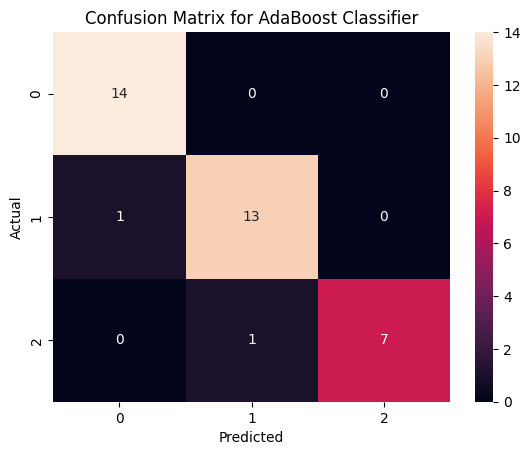

In [10]:
cm = confusion_matrix(y_test, adb_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()